<a href="https://colab.research.google.com/github/Sam-Eldin/DeepLearning_Hw2/blob/main/Hw2OneNote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/PeizeSun/OneNet.git

Cloning into 'OneNet'...
remote: Enumerating objects: 677, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 677 (delta 48), reused 48 (delta 48), pack-reused 625
Receiving objects: 100% (677/677), 1.53 MiB | 19.77 MiB/s, done.
Resolving deltas: 100% (185/185), done.


In [48]:
cd OneNet


/content/OneNet


In [3]:
!nvcc --version


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [4]:
pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html


Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 735.4 MB 16 kB/s 
     |████████████████████████████████| 12.8 MB 65.6 MB/s 
     |████████████████████████████████| 7.6 MB 6.4 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0+cu113
    Uninstalling torch-1.11.0+cu113:
      Successfully uninstalled torch-1.11.0+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.12.0+cu113
    Uninstalling torchvision-0.12.0+cu113:
      Successfully uninstalled torchvision-0.12.0+cu113
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.11.0+cu113
    Uninstalling torchaudio-0.11.0+cu113:
      Successfully uninstalled torchaudio-0.11.0+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.12.0 requires torch

In [5]:
!python setup.py build develop


running build
running build_py
creating build
creating build/lib.linux-x86_64-3.7
creating build/lib.linux-x86_64-3.7/detectron2
copying detectron2/__init__.py -> build/lib.linux-x86_64-3.7/detectron2
creating build/lib.linux-x86_64-3.7/detectron2/projects
copying detectron2/projects/__init__.py -> build/lib.linux-x86_64-3.7/detectron2/projects
creating build/lib.linux-x86_64-3.7/detectron2/structures
copying detectron2/structures/rotated_boxes.py -> build/lib.linux-x86_64-3.7/detectron2/structures
copying detectron2/structures/__init__.py -> build/lib.linux-x86_64-3.7/detectron2/structures
copying detectron2/structures/keypoints.py -> build/lib.linux-x86_64-3.7/detectron2/structures
copying detectron2/structures/masks.py -> build/lib.linux-x86_64-3.7/detectron2/structures
copying detectron2/structures/image_list.py -> build/lib.linux-x86_64-3.7/detectron2/structures
copying detectron2/structures/instances.py -> build/lib.linux-x86_64-3.7/detectron2/structures
copying detectron2/struct

In [6]:
!pip install pyyaml==5.1 pycocotools>=2.0.1

In [7]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.7.1+cu101 True


In [44]:
!mkdir -p coco
!ln -s /path_to_coco_dataset/train2017 datasets/coco/train2017
!ln -s /path_to_coco_dataset/val2017 datasets/coco/val2017

In [9]:
!wget http://images.cocodataset.org/zips/test2017.zip
!unzip test2017
!rm test2017.zip

Streaming output truncated to the last 5000 lines.
 extracting: test2017/000000251604.jpg  
 extracting: test2017/000000145034.jpg  
 extracting: test2017/000000234833.jpg  
 extracting: test2017/000000025927.jpg  
 extracting: test2017/000000393116.jpg  
 extracting: test2017/000000536478.jpg  
 extracting: test2017/000000365460.jpg  
 extracting: test2017/000000089887.jpg  
 extracting: test2017/000000274928.jpg  
 extracting: test2017/000000310028.jpg  
 extracting: test2017/000000229793.jpg  
 extracting: test2017/000000394339.jpg  
 extracting: test2017/000000564538.jpg  
 extracting: test2017/000000440585.jpg  
 extracting: test2017/000000541512.jpg  
 extracting: test2017/000000395525.jpg  
 extracting: test2017/000000235435.jpg  
 extracting: test2017/000000069964.jpg  
 extracting: test2017/000000131962.jpg  
 extracting: test2017/000000281392.jpg  
 extracting: test2017/000000534893.jpg  
 extracting: test2017/000000128676.jpg  
 extracting: test2017/000000187639.jpg  
 extra

In [28]:
!rm /content/OneNet/datasets/coco/annotations
!cd /content/OneNet/
!cd datasets
!./prepare_for_tests.sh
!cd ..

/bin/bash: line 0: cd: datasets: No such file or directory
--2022-04-30 16:25:05--  https://dl.fbaipublicfiles.com/detectron2/annotations/coco/instances_val2017_100.json
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.74.142, 172.67.9.4, 104.22.75.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.74.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 538304 (526K) [application/json]
Saving to: ‘coco/annotations/instances_val2017_100.json’

coco/annotations/in 100%[===================>] 525.69K  --.-KB/s    in 0.03s   

2022-04-30 16:25:05 (15.2 MB/s) - ‘coco/annotations/instances_val2017_100.json’ saved [538304/538304]

--2022-04-30 16:25:05--  https://dl.fbaipublicfiles.com/detectron2/annotations/coco/person_keypoints_val2017_100.json
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.74.142, 172.67.9.4, 104.22.75.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.74.1

In [45]:
!python projects/OneNet/train_net.py --num-gpus 1 \
    --config-file projects/OneNet/configs/onenet.res18.dcn.yaml \
    --eval-only MODEL.WEIGHTS /content/OneNet/configs/onenet_r18dcn.pth

Command Line Args: Namespace(config_file='projects/OneNet/configs/onenet.res18.dcn.yaml', dist_url='tcp://127.0.0.1:49152', eval_only=True, machine_rank=0, num_gpus=1, num_machines=1, opts=['MODEL.WEIGHTS', '/content/OneNet/configs/onenet_r18dcn.pth'], resume=False)
[04/30 16:30:58 detectron2]: Rank of current process: 0. World size: 1
[04/30 16:30:59 detectron2]: Environment info:
----------------------  ---------------------------------------------------------------
sys.platform            linux
Python                  3.7.13 (default, Apr 24 2022, 01:04:09) [GCC 7.5.0]
numpy                   1.21.6
detectron2              0.3 @/content/OneNet/detectron2
Compiler                GCC 7.5
CUDA compiler           CUDA 11.1
detectron2 arch flags   7.5
DETECTRON2_ENV_MODULE   <not set>
PyTorch                 1.7.1+cu101 @/usr/local/lib/python3.7/dist-packages/torch
PyTorch debug build     False
GPU available           True
GPU 0                   Tesla T4 (arch=7.5)
CUDA_HOME            

In [54]:
!python demo/demo.py\
    --config-file projects/OneNet/configs/onenet.res18.dcn.yaml \
    --input /content/OneNet/test2017/000000000318.jpg --output /content/OneNet/output_image --confidence-threshold 0.4 \
    --opts MODEL.WEIGHTS /content/OneNet/configs/onenet_r18dcn.pth

[04/30 16:41:57 detectron2]: Arguments: Namespace(confidence_threshold=0.4, config_file='projects/OneNet/configs/onenet.res18.dcn.yaml', input=['/content/OneNet/test2017/000000000318.jpg'], opts=['MODEL.WEIGHTS', '/content/OneNet/configs/onenet_r18dcn.pth'], output='/content/OneNet/output_image', video_input=None, webcam=False)
[04/30 16:42:01 fvcore.common.checkpoint]: [Checkpointer] Loading from /content/OneNet/configs/onenet_r18dcn.pth ...
  0% 0/1 [00:00<?, ?it/s][04/30 16:42:01 detectron2]: /content/OneNet/test2017/000000000318.jpg: detected 10 instances in 0.09s
100% 1/1 [00:00<00:00,  2.92it/s]


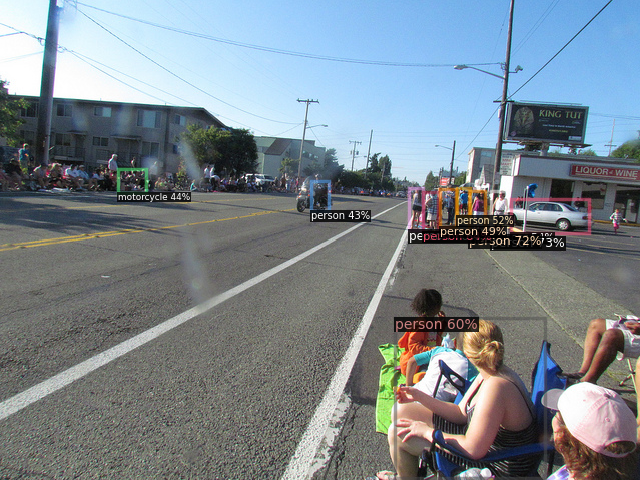

In [56]:
from IPython.display import Image
Image('/content/OneNet/output_image.png')